# Zonotope Analysis Part 1
In commit `3e70619` we have implemented a working version of Zonotope propagation without refinement.
The current version (still?) uses LP solving on every split in order to avoid an explosion of Zonotopes.

Questions we are interested in:
- At what depth do we show equivalence/at what depth does the Zonotope become infeasible?
- How precise is the equivalence we show? For how many cases do we need refinement?

In [2]:
import parse
import matplotlib.pyplot as plt
import numpy as np

In [3]:
acas_1_1 = parse.BenchmarkRun("../results/OLD/ACASXU_run2a_1_1_batch_2000-trunc/1/nnequiv-3e70619/stdout.log","../results/OLD/ACASXU_run2a_1_1_batch_2000-trunc/1/nnequiv-3e70619/stderr.log")
acas_1_2 = parse.BenchmarkRun("../results/OLD/ACASXU_run2a_1_2_batch_2000-trunc/1/nnequiv-3e70619/stdout.log","../results/OLD/ACASXU_run2a_1_2_batch_2000-trunc/1/nnequiv-3e70619/stderr.log")
har = parse.BenchmarkRun("../results/OLD/HAR-trunc/1/nnequiv-21af8ae/stdout.log","../results/OLD/HAR-trunc/1/nnequiv-21af8ae/stderr.log")

## Decision Depth Histogram

/home/steuber/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


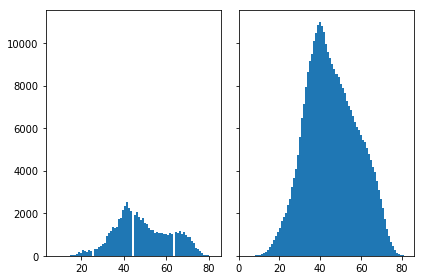

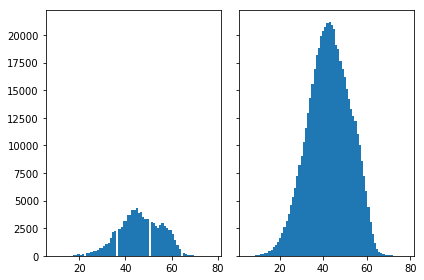

In [4]:
%matplotlib inline
def plot_depth_hist(run):
    fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)
    max_val = max(max(run.depth.valid_depth),max(run.depth.invalid_depth))
    min_val = min(min(run.depth.valid_depth),min(run.depth.invalid_depth))
    n_bins = max_val-min_val+1

    # We can set the number of bins with the `bins` kwarg
    return (axs[0].hist(run.depth.valid_depth, bins=n_bins),
    axs[1].hist(run.depth.invalid_depth, bins=n_bins))

depth_hists_1_1=plot_depth_hist(acas_1_1)
depth_hists_1_2=plot_depth_hist(acas_1_2)

## Shown (Non-)Equivalence

Non Equivalent: 0
Non Equivalent: 0
Non Equivalent: 8880
Max: 1.6747442483901978


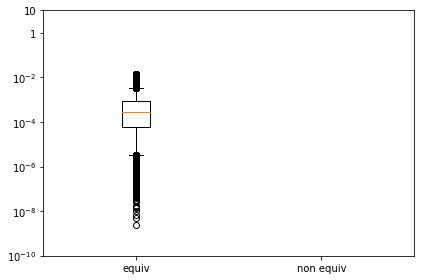

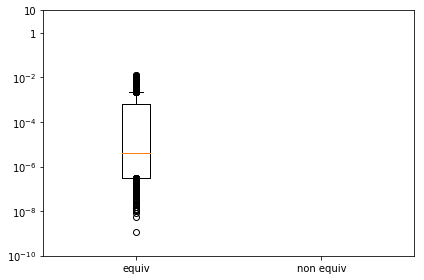

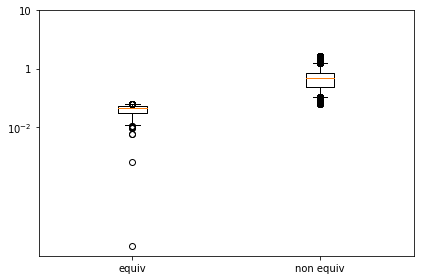

In [6]:
%matplotlib inline
def plot_equiv_hist(run,ticks=(1,0, -2,-4,-6,-8,-10),labels=("10","1","$10^{-2}$","$10^{-4}$","$10^{-6}$","$10^{-8}$","$10^{-10}$")):
    fig, axs = plt.subplots(1, 1, sharey=True, tight_layout=True)
    n_bins =80
    print(f"Non Equivalent: {len(run.equiv.nonequiv)}")
    if len(run.equiv.nonequiv)>0:
        print(f"Max: {max(run.equiv.nonequiv)}")
    # We can set the number of bins with the `bins` kwarg
    #return (axs[0].hist(run.equiv.equiv, bins=n_bins),
    #axs[1].hist(run.equiv.nonequiv, bins=n_bins))
    plt.boxplot([np.log10(run.equiv.equiv), np.log10(np.array(run.equiv.nonequiv))],whis=(5,95))
    plt.xticks(ticks=(1,2),labels=("equiv", "non equiv"))
    plt.yticks(ticks=ticks,labels=labels)

equiv_hists_1_1=plot_equiv_hist(acas_1_1)
equiv_hists_1_2=plot_equiv_hist(acas_1_2)
equiv_hists_har=plot_equiv_hist(har,ticks=[1,0,-1])

# Zonotope Analysis Part 2

In commit `3f00a06` we evaluate the same Zonotope propagation as previously, however we run it on the full property 1 (a first for our GPE approach) and we track the distances from 0 at splits (i.e. the overlap across the 0).

Questions we are interested in:

- Is there a (somewhat) clear distinction between the overlap for invalid splits and the overlap for valids splits?



In [8]:
acas_1_1 = parse.BenchmarkRun("../results/OLD/ACASXU_run2a_1_1_batch_2000-trunc/1/nnequiv-3f00a06/stdout.log","../results/OLD/ACASXU_run2a_1_1_batch_2000-trunc/1/nnequiv-3f00a06/stderr.log")
acas_1_2 = parse.BenchmarkRun("../results/OLD/ACASXU_run2a_1_2_batch_2000-trunc/1/nnequiv-3f00a06/stdout.log","../results/OLD/ACASXU_run2a_1_2_batch_2000-trunc/1/nnequiv-3f00a06/stderr.log")

Handling depth_offset (may take some time)
 [(0.044984847, 5), (0.02796534, 6), (0.054615185, 7), (0.054125533, 8), (0.
Handling depth_offset (may take some time)
Handling depth_offset (may take some time)
 [(0.050202943, 7), (0.04684838, 10), (0.034162328, 11), (0.03180854, 12), (
Handling depth_offset (may take some time)


## Once again the Depth Histograms
For comparison to restricted property 1...

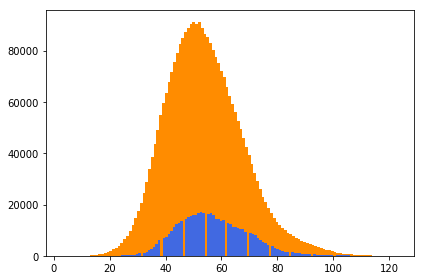

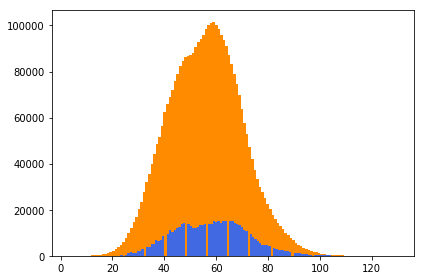

In [9]:
def plot_hists_depth(run):
    fig, axs = plt.subplots(1, 1, sharey=True, tight_layout=True)
    valid = np.array(run.depth.valid_depth,dtype=np.int)
    invalid = np.array(run.depth_offset.invalid_depth[:,1],dtype=np.int)
    max_val = max(np.max(valid),np.max(invalid))
    min_val = min(np.min(valid),np.min(invalid))
    n_bins = max_val-min_val+1

    # We can set the number of bins with the `bins` kwarg
    axs.hist(invalid, bins=n_bins,color='darkorange')
    axs.hist(valid, bins=n_bins,color='royalblue')
plot_hists_depth(acas_1_1)
plot_hists_depth(acas_1_2)

In [11]:
import scipy.stats as stats

In [12]:
v_fit_alpha_1_1, v_fit_loc_1_1, v_fit_beta_1_1=stats.gamma.fit(acas_1_1.depth_offset.valid_depth[:,0])
i_fit_alpha_1_1, i_fit_loc_1_1, i_fit_beta_1_1=stats.gamma.fit(acas_1_1.depth_offset.invalid_depth[:,0])
v_fit_alpha_1_2, v_fit_loc_1_2, v_fit_beta_1_2=stats.gamma.fit(acas_1_2.depth_offset.valid_depth[:,0])
i_fit_alpha_1_2, i_fit_loc_1_2, i_fit_beta_1_2=stats.gamma.fit(acas_1_2.depth_offset.invalid_depth[:,0])
print((v_fit_alpha_1_1, v_fit_loc_1_1, v_fit_beta_1_1))
print((v_fit_alpha_1_2, v_fit_loc_1_2, v_fit_beta_1_2))
print((i_fit_alpha_1_1, i_fit_loc_1_1, i_fit_beta_1_1))
print((i_fit_alpha_1_2, i_fit_loc_1_2, i_fit_beta_1_2))

(0.0323159329947997, 0.00010046362999982868, 2.5048903970693925)
(0.1190055843442214, 0.0001000128699999986, 2.787966056863205)
(0.017635951325769547, 0.00010015070399999999, 0.8957861844715469)
(0.10137200782749156, 9.960270587258323e-05, 2.079719063262021)


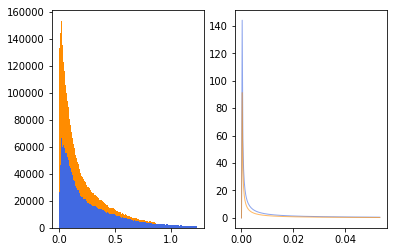

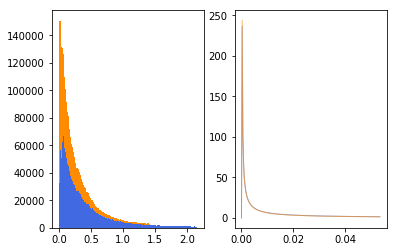

In [45]:
def reject_outliers(data, m=2):
    return data[abs(data - np.mean(data)) < m * np.std(data)]
def plot_hists_depth(run, v_fit, i_fit, max_point):
    fig, axs = plt.subplots(1, 2, sharey=False, tight_layout=False)
    valid = reject_outliers(run.depth_offset.valid_depth[:,0],1)
    invalid = reject_outliers(run.depth_offset.invalid_depth[:,0],1)
    v_fit_alpha, v_fit_loc, v_fit_beta = v_fit
    i_fit_alpha, i_fit_loc, i_fit_beta = i_fit
    # We can set the number of bins with the `bins` kwarg
    axs[0].hist([valid,invalid], bins='auto',color=['royalblue','darkorange'],stacked=True)
    x = np.linspace(1e-8, max_point, 200)
    axs[1].plot(x, stats.gamma.pdf(x, v_fit_alpha, v_fit_loc, v_fit_beta), lw=1, alpha=0.6, label='gamma pdf',color='royalblue')
    axs[1].plot(x, stats.gamma.pdf(x, i_fit_alpha, i_fit_loc, i_fit_beta), lw=1, alpha=0.6, label='gamma pdf',color='darkorange')
    #axs.hist(invalid, bins='auto',color='darkorange',stacked=True)
max_point_1 = max(stats.gamma.ppf(0.66, v_fit_alpha_1_1, v_fit_loc_1_1, v_fit_beta_1_1),stats.gamma.ppf(0.66, i_fit_alpha_1_1, i_fit_loc_1_1, i_fit_beta_1_1))
max_point_2 = max(stats.gamma.ppf(0.66, v_fit_alpha_1_2, v_fit_loc_1_2, v_fit_beta_1_2),stats.gamma.ppf(0.66, i_fit_alpha_1_2, i_fit_loc_1_2, i_fit_beta_1_2))
max_point = max(max_point_1, max_point_2)
plot_hists_depth(acas_1_1,(v_fit_alpha_1_1, v_fit_loc_1_1, v_fit_beta_1_1),(i_fit_alpha_1_1, i_fit_loc_1_1, i_fit_beta_1_1),max_point)
plot_hists_depth(acas_1_2,(v_fit_alpha_1_2, v_fit_loc_1_2, v_fit_beta_1_2),(i_fit_alpha_1_2, i_fit_loc_1_2, i_fit_beta_1_2),max_point)

### Results
We see:
- Depth distributed according to normal distribution
- Overlap distributed according to gamma Distribution(?)


#### Unfinished:

We now try to compute the odds of a split being valid/invalid for a given overlap.
$$
\frac{
P\left[v \mid \text{valid}\right]
}{
P\left[v \mid \text{invalid}\right]
}
$$

0.5716615177211023


/home/steuber/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in true_divide
  


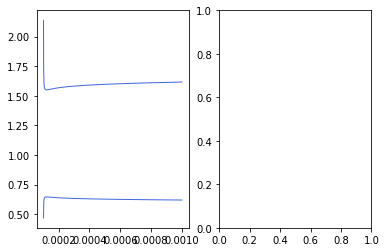

In [67]:
import scipy
p_valid = len(acas_1_1.depth_offset.valid_depth[:,0])/(len(acas_1_1.depth_offset.valid_depth[:,0])+len(acas_1_1.depth_offset.invalid_depth[:,0]))
print(p_valid)
x = np.linspace(1.1e-8, 1e-3, 1000)
#x = np.linspace(1.1e-8, max_point, 100)
fig, axs = plt.subplots(1, 2, sharey=False, tight_layout=False)
#axs.plot(x, stats.gamma.pdf(x, o_fit_alpha, o_fit_loc, o_fit_beta), lw=1, alpha=0.6, label='gamma pdf',color='black')
y1_1_1 = stats.gamma.pdf(x, v_fit_alpha_1_1, v_fit_loc_1_1, v_fit_beta_1_1)/stats.gamma.pdf(x, i_fit_alpha_1_1, i_fit_loc_1_1, i_fit_beta_1_1)
y2_1_1 = 1/y1_1_1
#axs[0].set_xlim([1.1e-8,1e-4])
axs[0].plot(x, y1_1_1, lw=1, label='gamma pdf',color='royalblue')
axs[0].plot(x, y2_1_1, lw=1, label='gamma pdf',color='royalblue')
#i_fit_alpha, i_fit_loc, i_fit_beta = i_fit_1_1
#axs[0].plot(x, (stats.gamma.pdf(x, i_fit_alpha, i_fit_loc, i_fit_beta)*(1-p_valid))/stats.gamma.pdf(x, o_fit_alpha, o_fit_loc, o_fit_beta), lw=1, alpha=0.6, label='gamma pdf',color='darkorange')
#axs[1].semilogy(basey=2)
#axs[1].plot(x, (stats.gamma.pdf(x, v_fit_alpha, v_fit_loc, v_fit_beta)*p_valid)/stats.gamma.pdf(x, o_fit_alpha, o_fit_loc, o_fit_beta)/(stats.gamma.pdf(x, i_fit_alpha, i_fit_loc, i_fit_beta)*(1-p_valid))/stats.gamma.pdf(x, o_fit_alpha, o_fit_loc, o_fit_beta), lw=1, alpha=0.6, label='gamma pdf',color='black')
